In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
tf.__version__

'1.14.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
x_train = (x_train / 255).reshape(x_train.shape[0], 28, 28, 1)
x_test = (x_test / 255).reshape(x_test.shape[0], 28, 28, 1)

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy'
#     metrics=['accuracy']
)

print(model.summary())

model.fit(
    x_train,
    y_train,
    epochs=10
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node loss_2/dense_5_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[loss_2/mul/_211]]
  (1) Invalid argument: logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node loss_2/dense_5_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored.

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 2s 243us/step
Test accuracy: 0.905
Test loss: 0.2817447243094444


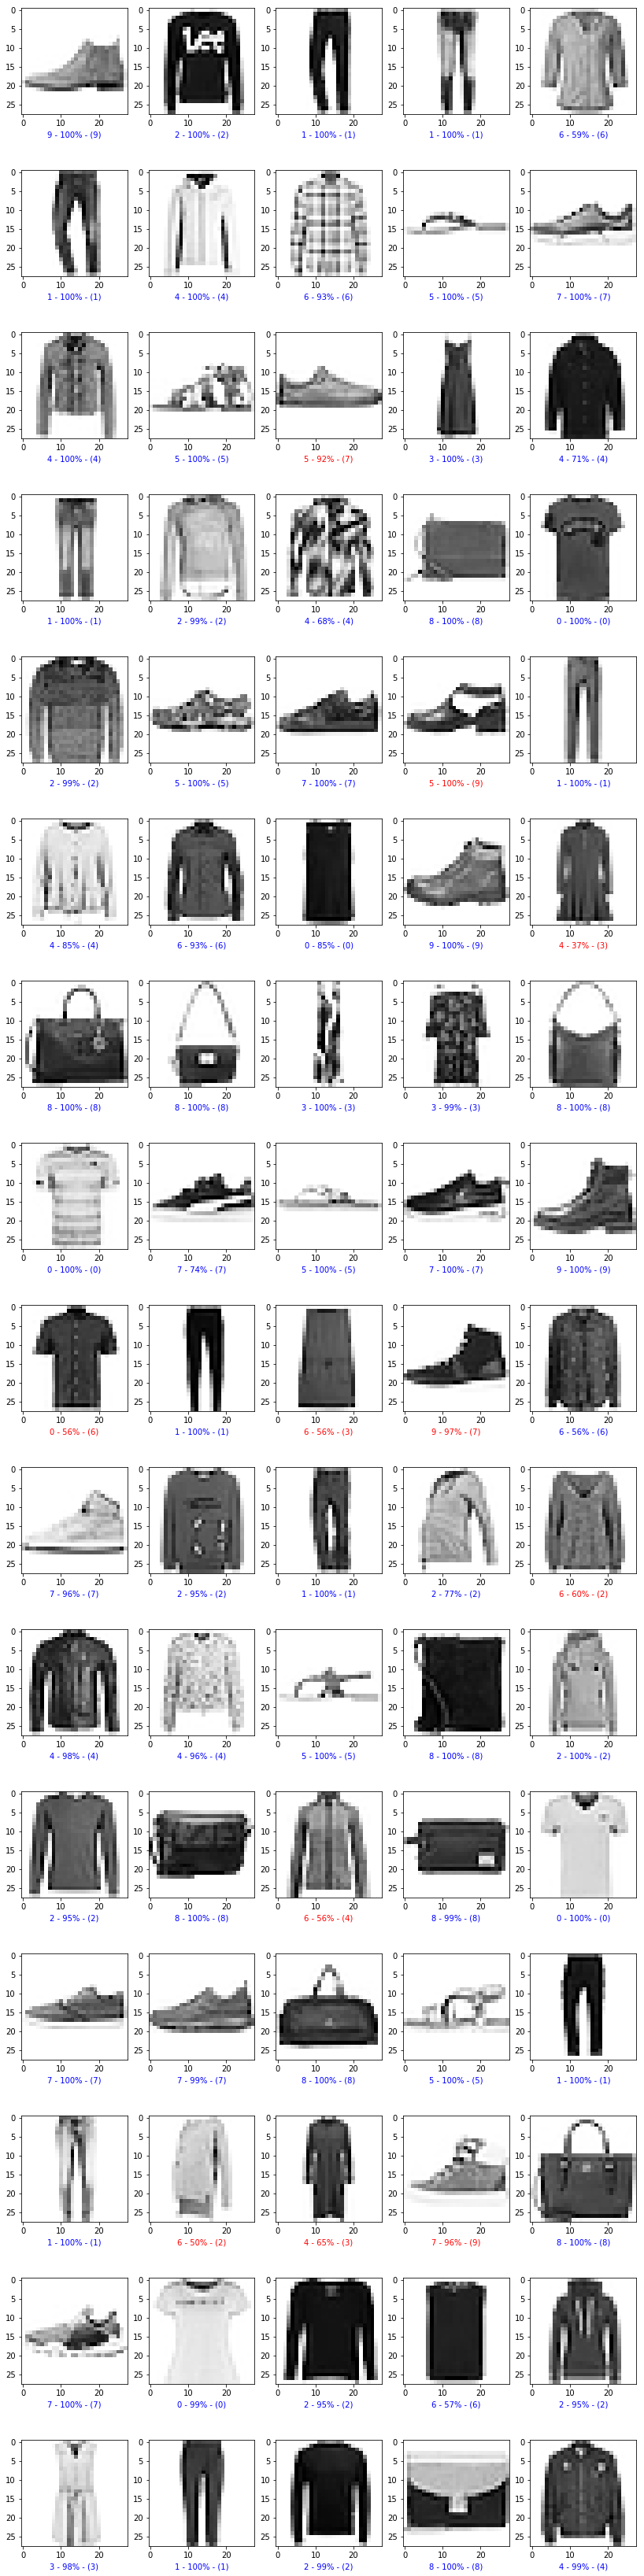

In [21]:
plt.figure(figsize=(14, 60))
predictions = model.predict(x_test[:80])
for i in range(80):
    plt.subplot(16, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} - {:2.0f}% - ({})".format(predicted_label,
                                        100*np.max(predictions[i]),
                                        true_label),
              color=color)
plt.show()